# PVInspect Show plugins

The containers `Image` and `ImageSequence` come with certain methods to show the contained data. The behavior of these methods can be customized by plugins. Here, we give a simple example that overlays class annotations with the images. Of course, this is only for demonstration purposes and much more complex plugins are possible.

In [11]:
import pvinspect as pv
from pvinspect import datasets
from pvinspect.data.image import ShowPlugin, register_show_plugin
from matplotlib import pyplot as plt

Let's first load our favourite demo dataset:

In [12]:
seq = datasets.elpv()
seq.meta

,original_filename,modality,defect_probability,wafer,crack,inactive,blob,finger,testset
0,cell1922.png,EL_IMAGE,0.000000,poly,False,False,False,False,True
1,cell0382.png,EL_IMAGE,1.000000,mono,True,False,False,True,False
2,cell2595.png,EL_IMAGE,0.000000,poly,False,False,False,False,True
3,cell2581.png,EL_IMAGE,0.333333,poly,False,False,False,False,False
4,cell0396.png,EL_IMAGE,1.000000,mono,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...
2619,cell1091.png,EL_IMAGE,0.000000,mono,False,False,False,False,False
2620,cell2598.png,EL_IMAGE,0.000000,poly,False,False,False,False,False
2621,cell1085.png,EL_IMAGE,0.666667,mono,False,False,True,True,False
2622,cell1913.png,EL_IMAGE,0.333333,poly,False,False,False,True,False


Next, we need to implement the `ShowPlugin` interface. Here, the `apply`-method receives the image that is currently drawn, the `Axes`-object it is drawn on as well as an arbitrary number of optional arguments that may be specified to customize the behavior of the plugin:

In [13]:
class OverlayDefectAnnotations(ShowPlugin):

    def apply(self, ax, image, show_defect_annotations: bool = True, **kwargs):  # do not forget the **kwargs here!
        super().apply(ax, image, **kwargs)
        
        if show_defect_annotations:
            text = "c/i" if image.get_meta("crack") and image.get_meta("inactive") \
                else "c/-" if image.get_meta("crack") else "-/i" if image.get_meta("inactive") else "-/-"
            ax.text(50, 50, text, fontsize=12, horizontalalignment='left', \
                verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    def is_active(self, image):
        super().is_active(image)
        return image.has_meta("crack") and image.has_meta("inactive")

Now, we need to register the plugin to the toolbox:

In [14]:
register_show_plugin("overlay_defect_annotations", OverlayDefectAnnotations(title="overlay defects", priority=0))

The `priority`-parameter is used to define the order in which plugins are executed. Specifically, plugins with a larger priority are executed later, such that they may overwrite the results from other plugins with lower priority. Infact, all built-in plugins have a priority that is smaller than 0.

Now, we can show parts of the sequence to see the effect:

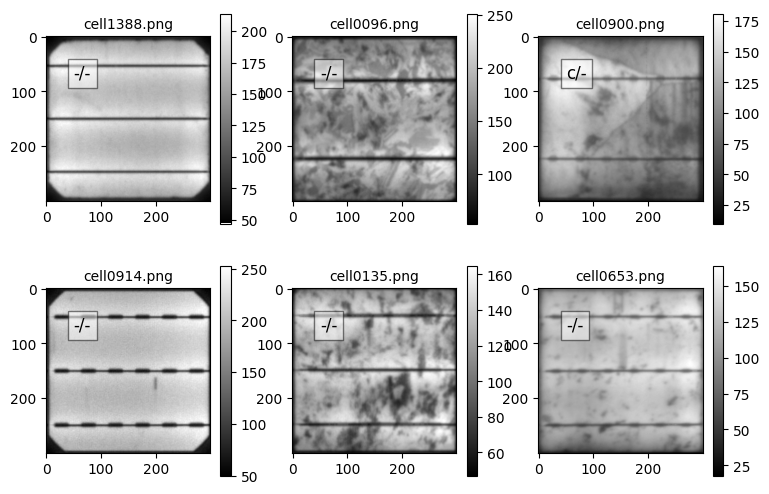

In [15]:
seq[800:].head(N=6, cols=3)

Recall that we added an optional argument `show_defect_annotations` that may be used to turn the behavior on or off. This can be passed to the `head`-method as well:

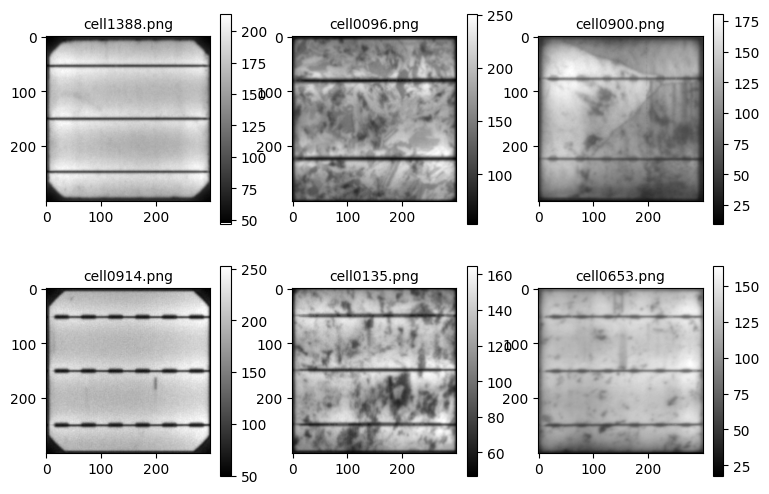

In [16]:
seq[800:].head(N=6, cols=3, show_defect_annotations=False)